<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/Color_Fashion_MSIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!wget -q -P./ https://www.dropbox.com/s/w07liww46kgxo1m/handbags-shoes.zip

In [29]:
!unzip -qq handbags-shoes.zip

#Data Preprocessing

In [30]:
import os,shutil,pathlib

base_dir = pathlib.Path('/content/handbags-shoes')

In [31]:
#! rm -rf /content/handbags-shoes


In [32]:
for category in ('handbags','shoes'):
  fnames = os.listdir(base_dir/category)

  dir = base_dir/ 'train' / category
  os.makedirs(dir)
  for fname in fnames[:50]:
    shutil.copyfile(src=base_dir/category/fname,dst=dir/fname)

  dir = base_dir/ 'validation' / category
  os.makedirs(dir)
  for fname in fnames[50:75]:
    shutil.copyfile(src=base_dir/category/fname,dst=dir/fname)


  dir = base_dir/ 'test' / category
  os.makedirs(dir)
  for fname in fnames[75:]:
    shutil.copyfile(src=base_dir/category/fname,dst=dir/fname)


In [33]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
train_dataset = keras.utils.image_dataset_from_directory(base_dir/ 'train',image_size=(224,224),batch_size=32)

validation_dataset = keras.utils.image_dataset_from_directory(base_dir/ 'validation',image_size=(224,224),batch_size=32)

test_dataset = keras.utils.image_dataset_from_directory(base_dir/ 'test',image_size=(224,224),batch_size=32)


Found 97 files belonging to 2 classes.
Found 49 files belonging to 2 classes.
Found 39 files belonging to 2 classes.


### Let's Check the dimentions of images

In [35]:
for images,_ in train_dataset.take(1):
  print(images[0].shape)

(224, 224, 3)


### Let's see some examples

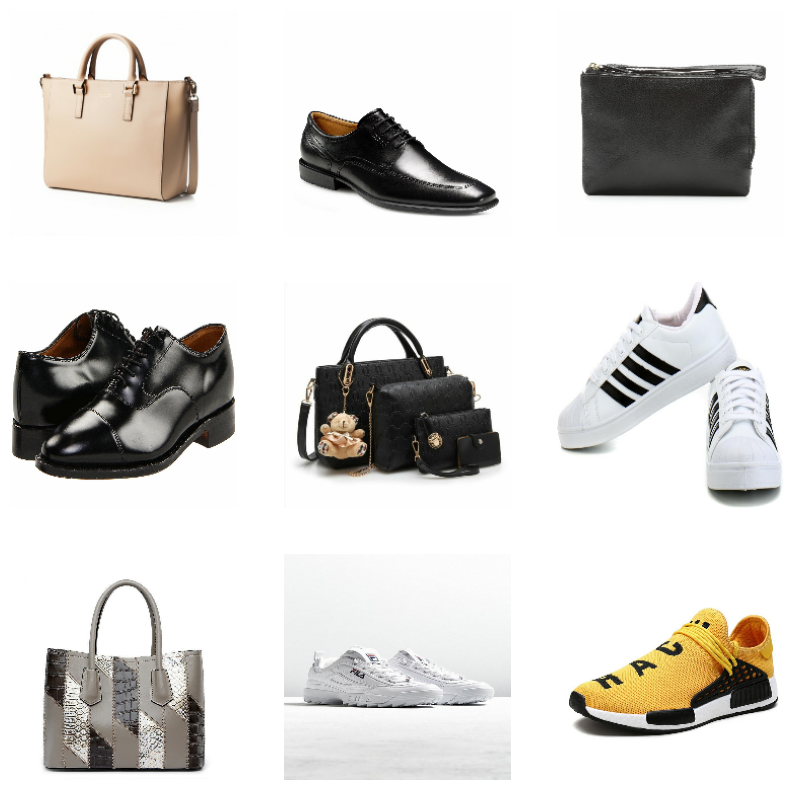

In [36]:
plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


### Let's try CNN with two convulutional layers

In [37]:
# Input layer
input = keras.Input(shape = (224,224,3))

# We can insert the data augmentation layer when the dataset size is low
x = keras.layers.RandomFlip("horizontal")(input)
x = keras.layers.RandomZoom(.1)(x)
x = keras.layers.RandomRotation(.1)(x)


# Convulutional Block 1

x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "Conv_1")(input)

# MaxPool layer

x = keras.layers.MaxPool2D()(x)

# Convultional Block 2

x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "Conv_2")(x)

# MaxPool layer

x = keras.layers.MaxPool2D()(x)

# flattening the images

x = keras.layers.Flatten()(x)

# Output layer
output = keras.layers.Dense(1,activation = "sigmoid")(x)

model = keras.Model(input,output)

### Model Summary

In [38]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 110, 110, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 96800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        96,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,345 (395.88 KB)

 Trainable params: 101,345 (395.88 KB)

 Non-trainable params: 0 (0.00 B)

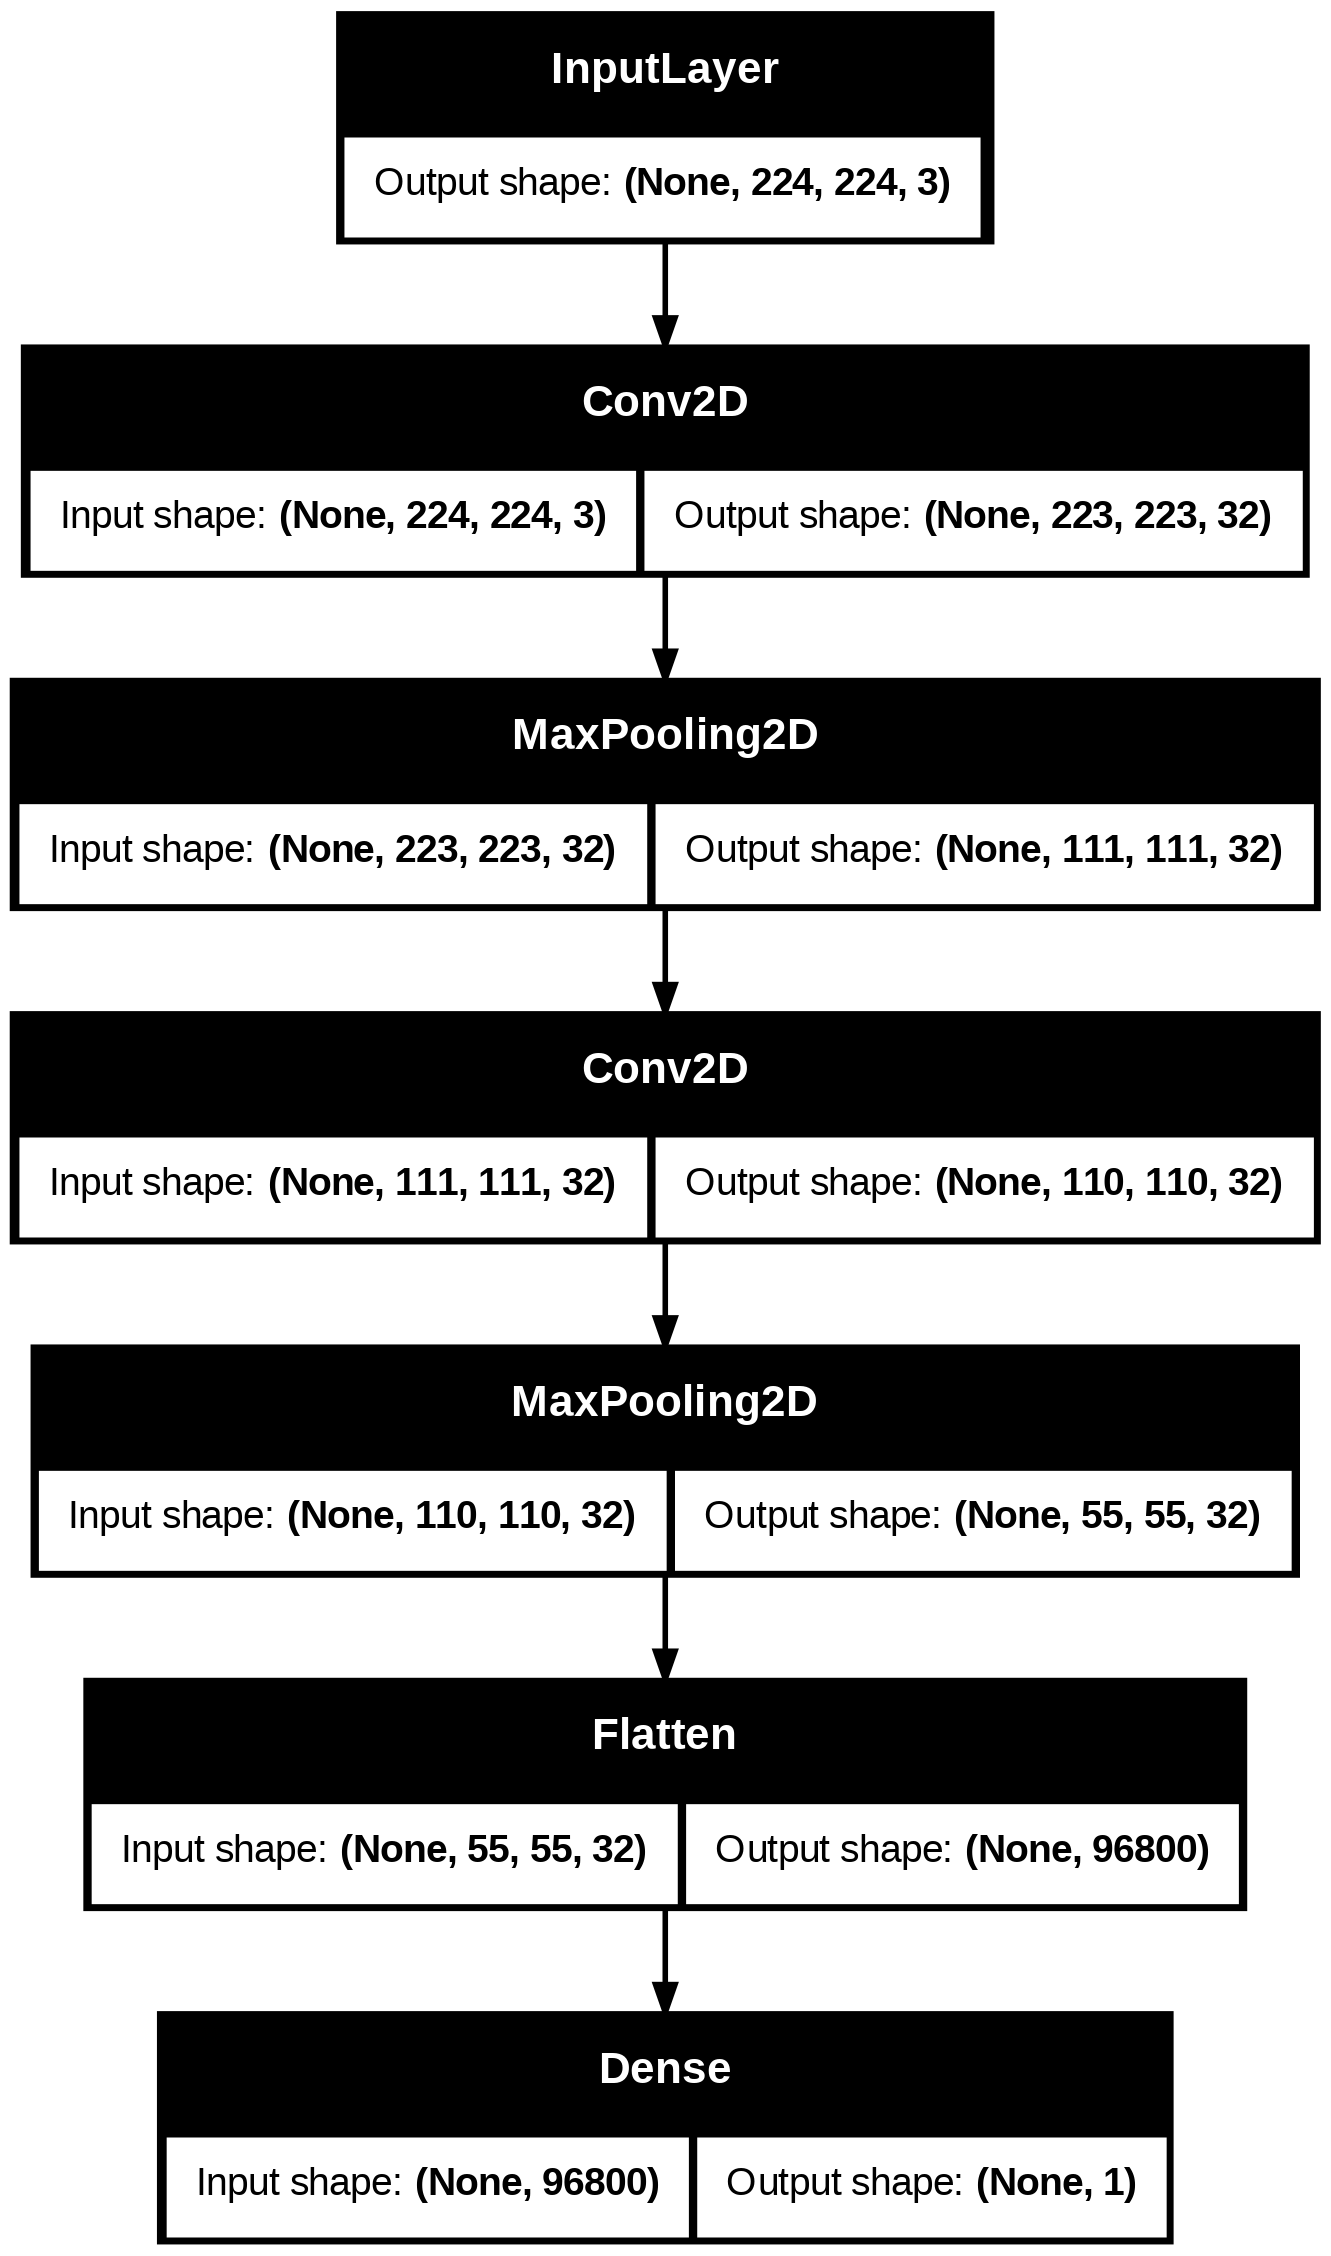

In [39]:
keras.utils.plot_model(model,show_shapes=True)

### Compilation Model

In [40]:
model.compile(loss = "binary_crossentropy" ,optimizer="adam", metrics=["accuracy"])



### Let's train the model using training dataset

In [41]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 721ms/step - accuracy: 0.3702 - loss: 696.7734 - val_accuracy: 0.5102 - val_loss: 76.3684
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.5135 - loss: 230.6086 - val_accuracy: 0.5102 - val_loss: 190.6321
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5393 - loss: 127.8419 - val_accuracy: 0.4898 - val_loss: 210.5341
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.5084 - loss: 196.1236 - val_accuracy: 0.5510 - val_loss: 92.9786
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.6688 - loss: 56.5187 - val_accuracy: 0.5306 - val_loss: 65.8068
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.7062 - loss: 27.4853 - val_accuracy: 0.8367 - val_loss: 8.1977
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.9471 - loss: 1.7040 - val_accuracy: 0.8776 - val_loss: 8.6857
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.9564 - loss: 1.6593 - val_accuracy: 0

Let's see the performance

In [42]:
# Let's create the Functions for plotting the Validation error and accuracy curves

def plot_val_los(history):
  plt.clf()
  history_dict = history.history
  loss = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1,len(val_loss_values)+1)
  plt.plot(epochs,loss,"ro",label = "Training Loss")
  plt.plot(epochs,val_loss_values,"b",label = "Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


def plot_acc_los(history):
  plt.clf()
  history_dict = history.history
  accuracy = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1,len(accuracy)+1)
  plt.plot(epochs,accuracy,"ro",label = "Training accuracy")
  plt.plot(epochs,val_acc,"b",label = "Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()



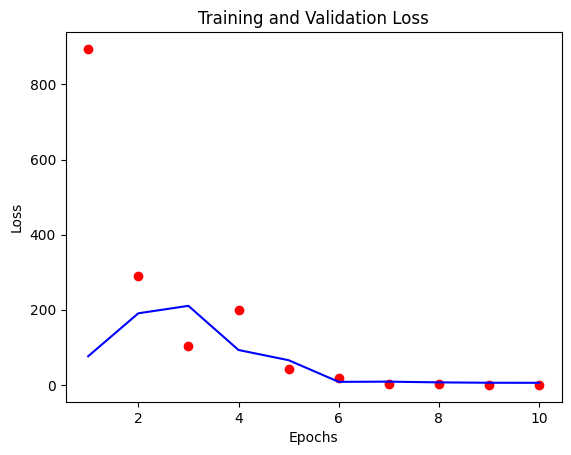

In [43]:
# Plotting the Loss of Training and validation

plot_val_los(history)



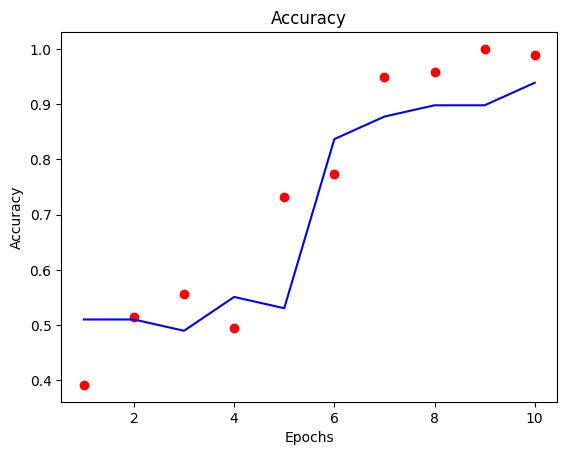

In [44]:
#Plotting the Accuracy

plot_acc_los(history)

###Let's see the perfomance of the model

In [45]:
h = model.evaluate(test_dataset)
print("Accuracy: ",h[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 0.8074 - loss: 6.3622
Accuracy:  0.8205128312110901


Now we need to improve the model through data augmentation

In [46]:
def data_augmentation(image):
  x = keras.layers.RandomFlip("horizontal")(image)
  x = keras.layers.RandomZoom(.1)(x)
  x = keras.layers.RandomRotation(.1)(x)
  return x

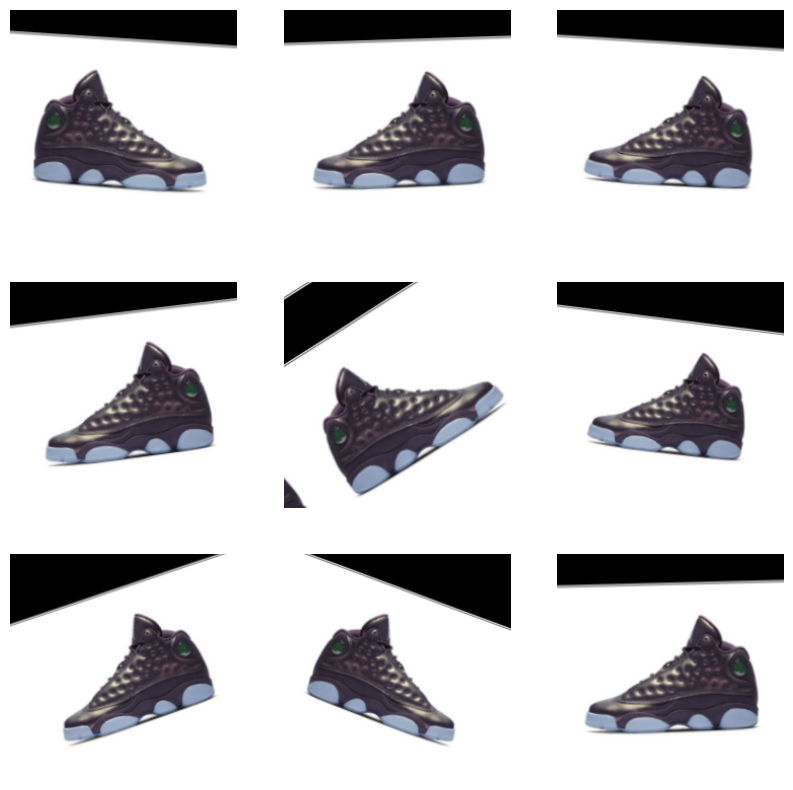

In [47]:

plt.figure(figsize=(10,10))
for image,_ in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    augmented_image = data_augmentation(image[0])
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis("off")